In [ ]:
# Model is: ln(prod,y / pop,y) = k+c1*y+c2*ln(GDP,y/Pop,y)+c3*ln(Prod,y-1/Pop,y-1)
# where the c1*y term is the ordinal of y 
# lagged dependent variable

# Q1. how to perform this using a python package
# Q2. how to perform regression over all 21 economies at the same time to generate 21 regressions?

# https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
data = pd.read_csv("04_CHL.csv")
data.head()

,year,GDP,Pop,Steel
0,1980,75244937.47,11178.81699,809000
1,1981,78802559.99,11348.44199,724000
2,1982,70661594.54,11527.27403,334000
3,1983,67980358.79,11714.44195,462000
4,1984,73394748.44,11908.18892,628000


In [3]:
# data in per capita
data['GDP_pc'] = data[['GDP']].div(data.Pop, axis=0)
data['Prod_pc'] = data[['Steel']].div(data.Pop, axis=0)
data.head()

,year,GDP,Pop,Steel,GDP_pc,Prod_pc
0,1980,75244937.47,11178.81699,809000,6731.028653,72.369017
1,1981,78802559.99,11348.44199,724000,6943.910015,63.797304
2,1982,70661594.54,11527.27403,334000,6129.948360,28.974760
3,1983,67980358.79,11714.44195,462000,5803.123963,39.438498
4,1984,73394748.44,11908.18892,628000,6163.384620,52.736819


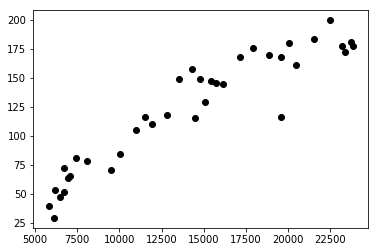

In [4]:
# visualize GDP per capita on Production per capita 
plt.figure(figsize=(6, 4))
plt.scatter(
    data['GDP_pc'],
    data['Prod_pc'],
    c='black'
)

In [5]:
# from above, looks to be logarithmic 
# take ln to linearize
data['GDP_pc_ln'] = np.log(data.GDP_pc)
data['Prod_pc_ln'] = np.log(data.Prod_pc)
data.head()

,year,GDP,Pop,Steel,GDP_pc,Prod_pc,GDP_pc_ln,Prod_pc_ln
0,1980,75244937.47,11178.81699,809000,6731.028653,72.369017,8.814483,4.281778
1,1981,78802559.99,11348.44199,724000,6943.910015,63.797304,8.845620,4.155711
2,1982,70661594.54,11527.27403,334000,6129.948360,28.974760,8.720942,3.366425
3,1983,67980358.79,11714.44195,462000,5803.123963,39.438498,8.666152,3.674742
4,1984,73394748.44,11908.18892,628000,6163.384620,52.736819,8.726381,3.965314


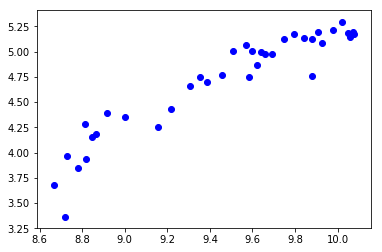

In [6]:
# visualize GDP per capita on Production per capita in ln terms 
plt.figure(figsize=(6, 4))
plt.scatter(
    data['GDP_pc_ln'],
    data['Prod_pc_ln'],
    c='blue'
)

In [26]:
# regression without lag term
# regression using Sci-kit Learn
X = data[['GDP_pc_ln']]
y = data['Prod_pc_ln'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X[['GDP_pc_ln']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
print(reg.coef_)
print(reg.intercept_)

[[1.04012699]]
[-5.14347772]


In [30]:
reg.predict(X)

array([[4.05709069],
       [3.92740902],
       [3.87042053],
       [3.93306705],
       [3.98727505],
       [4.02649916],
       [4.07539088],
       [4.13104006],
       [4.21735967],
       [4.38032657],
       [4.44173816],
       [4.53543631],
       [4.58579909],
       [4.62137819],
       [4.69528141],
       [4.74921622],
       [4.80970278],
       [4.8402365 ],
       [4.82275038],
       [4.86397875],
       [4.88545005],
       [4.90535595],
       [4.93534285],
       [4.99635939],
       [5.04323579],
       [5.09592953],
       [5.1348338 ],
       [5.16024496],
       [5.13341077],
       [5.18240064],
       [5.23434788],
       [5.2787705 ],
       [5.31086192],
       [5.32012265],
       [5.33506643],
       [5.33957814]])

In [9]:
# add laged dependent variable term
data['Prod_pc_ln_lag'] = data['Prod_pc_ln'].shift(periods=1)
data = data.dropna()
data.head()

,year,GDP,Pop,Steel,GDP_pc,Prod_pc,GDP_pc_ln,Prod_pc_ln,Prod_pc_ln_lag
1,1981,78802559.99,11348.44199,724000,6943.910015,63.797304,8.845620,4.155711,4.281778
2,1982,70661594.54,11527.27403,334000,6129.948360,28.974760,8.720942,3.366425,4.155711
3,1983,67980358.79,11714.44195,462000,5803.123963,39.438498,8.666152,3.674742,3.366425
4,1984,73394748.44,11908.18892,628000,6163.384620,52.736819,8.726381,3.965314,3.674742
5,1985,78613636.43,12107.22507,570000,6493.117620,47.079326,8.778498,3.851834,3.965314


In [10]:
# regression with lagged dependent variable term
# regression using Sci-kit Learn
Xlag = data[['GDP_pc_ln','Prod_pc_ln_lag']]
y = data['Prod_pc_ln'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xlag[['GDP_pc_ln','Prod_pc_ln_lag']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
print(reg.coef_)
print(reg.intercept_)

[[0.80354641 0.22777734]]
[-3.96944053]


In [12]:
# using statsmodel
# with lag term
X2 = np.column_stack((data['GDP_pc_ln'], data['Prod_pc_ln_lag']))
y = data['Prod_pc_ln']

X2 = sm.add_constant(X2)
est = sm.OLS(y, X2,missing='drop')
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             Prod_pc_ln   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     137.5
Date:                Mon, 24 Jun 2019   Prob (F-statistic):           9.82e-17
Time:                        10:56:45   Log-Likelihood:                 14.090
No. Observations:                  36   AIC:                            -22.18
Df Residuals:                      33   BIC:                            -17.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9694      1.066     -3.725      0.0

In [13]:
# predictions using model - sklearn
predictions = reg.predict(Xlag)
y = data['Prod_pc_ln'].values.reshape(-1,1)

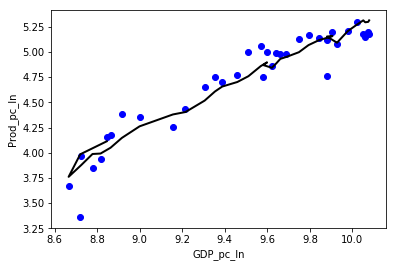

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(
    data['GDP_pc_ln'],
    data['Prod_pc_ln'],
    c='blue'
)
plt.plot(
    data['GDP_pc_ln'],
    predictions,
    c='blacK',
    linewidth=2
)
plt.xlabel("GDP_pc_ln")
plt.ylabel("Prod_pc_ln")
plt.show()

In [15]:
Result = np.exp(predictions)

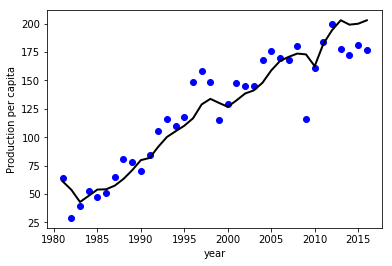

In [16]:
plt.scatter(
    data['year'],
    data['Prod_pc'],
    c='blue'
)
plt.plot(
    data['year'],
    Result,
    c='black',
    linewidth=2
)
plt.xlabel("year")
plt.ylabel("Production per capita")
plt.show()

In [19]:
# now start projection
data_p = pd.read_csv("04_CHL_forecast.csv")
data_p.head()

,year,GDP,Pop
0,2017,433123906.6,17910
1,2018,457489274.7,18055
2,2019,482243933.1,18197
3,2020,507191163.8,18336
4,2021,532183277.9,18472


In [23]:
# GDP per capita forecast
data_p['GDP_pc'] = data_p[['GDP']].div(data_p.Pop, axis=0)
data_p['GDP_pc_ln'] = np.log(data_p.GDP_pc)
data_p.head()

,year,GDP,Pop,GDP_pc,GDP_pc_ln
0,2017,433123906.6,17910,24183.356036,10.093420
1,2018,457489274.7,18055,25338.647173,10.140086
2,2019,482243933.1,18197,26501.287745,10.184949
3,2020,507191163.8,18336,27660.949160,10.227777
4,2021,532183277.9,18472,28810.268401,10.268487


In [29]:
# how to use this to generate forecast? 
# predicting without the lagged dependent variable
reg.predict(data_p['GDP_pc_ln'].values.reshape(-1,1))

array([[5.35496075],
       [5.40349948],
       [5.45016221],
       [5.4947091 ],
       [5.5370529 ],
       [5.57717058],
       [5.61515319],
       [5.65110381],
       [5.68516949],
       [5.71741569],
       [5.74813586],
       [5.77739544],
       [5.80552084],
       [5.83266552],
       [5.8588659 ],
       [5.88446487],
       [5.90941814],
       [5.93393337],
       [5.95794097],
       [5.98156516],
       [6.00486557],
       [6.02788432],
       [6.05064356],
       [6.07320234],
       [6.09546207],
       [6.11742986],
       [6.13920697],
       [6.16073271],
       [6.18204021],
       [6.20301016],
       [6.22368111],
       [6.24409105],
       [6.26407852],
       [6.28378393]])

In [ ]:
# where does Prod_pc_ln_lag come from here?
# maybe VAR? https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
# http://www.statsmodels.org/dev/generated/statsmodels.tsa.vector_ar.var_model.VAR.html

#Xproj = data_p[['GDP_pc_ln','Prod_pc_ln_lag']]
#projections = reg.predict(Xproj)

In [ ]:
# remaining items
# 1. include year ordinal -- is this necessary?
# 2. project (predict) using future values of GDP and population
# 3. perform for reminaing 21 economies - automate?